## Script to import bridge data, calculate priorities and plot priorities

Script imports data from csv files, converts them to dataframes, and calculates priorities.

In [11]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import seaborn as sns
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM, MapQuestOpenAerial, GoogleTiles
from cartopy.io.shapereader import Reader
import cartopy.feature as cfeature


#### Import data from csv files.

Data is not complete in either csv so both csv files are imported and merged together for complete info for all bridges.

In [12]:
Central = pd.read_csv('Assessment centralisation.csv')
Confirm = pd.read_csv('Bridge Stock Data .csv')
Material = pd.read_csv('Defects all.csv')
# Google = pd.read_csv('Google Import.csv')

Merge dataframes to create new dataframe named 'Merged'.

In [13]:
Merged = Confirm.merge(Central, how = 'left', on = ['feature_id'])

In [14]:
Material['feature_id'] = Material['feature_id'].map(lambda x: x[:-3])

In [15]:
Material.head(100)

site_code  plot_number feature_id feature_insp_date observe_type_code  \
0    12402489   3003541.01     ST0001  20/09/2018 11:27              BE01   
1    12402489   3003541.01     ST0001  20/09/2018 11:27              BE05   
2    12402489   3003541.01     ST0001  20/09/2018 11:27              BE08   
3    12402489   3003541.01     ST0001  20/09/2018 11:27              BE09   
4    12402489   3003541.01     ST0001  20/09/2018 11:27              BE09   
5    12402489   3003541.01     ST0001  20/09/2018 11:27              BE10   
6    12402489   3003541.01     ST0001  20/09/2018 11:27              BE17   
7    12402489   3003541.01     ST0001  20/09/2018 11:27              BE23   
8    12402489   3003541.01     ST0001  20/09/2018 11:27              BE23   
9    12402489   3003541.01     ST0001  20/09/2018 11:27              BE23   
10   12402489   3003541.01     ST0001  20/09/2018 11:27              BE24   
11   12402489   3003541.01     ST0001  20/09/2018 11:27              BE26   
12   12402489   3003541.01     ST0001  20/09/2018 11:27              BE31   
13   12402489   3003541.01     ST0001  20/09/2018 11:27              BE33   
14   12402489   3003541.01     ST0001  20/09/2018 11:27              BE36   
15   12410645   3002415.01     ST0002  05/10/2016 15:43              BE01   
16   12410645   3002415.01     ST0002  05/10/2016 15:43              BE06   
17   12410645   3002415.01     ST0002  05/10/2016 15:43              BE08   
18   12410645   3002415.01     ST0002  05/10/2016 15:43              BE09   
19   12410645   3002415.01     ST0002  05/10/2016 15:43              BE15   
20   12410645   3002415.01     ST0002  05/10/2016 15:43              BE17   
21   12410645   3002415.01     ST0002  05/10/2016 15:43              BE23   
22   12410645   3002415.01     ST0002  05/10/2016 15:43              BE24   
23   12410645   3002415.01     ST0002  05/10/2016 15:43              BE25   
24   12410645   3002415.01     ST0002  05/10/2016 15:43              BE26   
25   12410645   3002415.01     ST0002  05/10/2016 15:43              BE26   
26   12410645   3002415.01     ST0002  05/10/2016 15:43              BE29   
27   12410645   3002415.01     ST0002  05/10/2016 15:43              BE31   
28   12410645   3002415.01     ST0002  05/10/2016 15:43              BE31   
29   12410645   3002415.01     ST0002  05/10/2016 15:43              BE32   
..        ...          ...        ...               ...               ...   
70   12402552   3001482.01     ST0006  11/10/2016 10:20              BE02   
71   12402552   3001482.01     ST0006  11/10/2016 10:20              BE06   
72   12402552   3001482.01     ST0006  11/10/2016 10:20              BE08   
73   12402552   3001482.01     ST0006  11/10/2016 10:20              BE09   
74   12402552   3001482.01     ST0006  11/10/2016 10:20              BE10   
75   12402552   3001482.01     ST0006  11/10/2016 10:20              BE13   
76   12402552   3001482.01     ST0006  11/10/2016 10:20              BE14   
77   12402552   3001482.01     ST0006  11/10/2016 10:20              BE17   
78   12402552   3001482.01     ST0006  11/10/2016 10:20              BE20   
79   12402552   3001482.01     ST0006  11/10/2016 10:20              BE21   
80   12402552   3001482.01     ST0006  11/10/2016 10:20              BE23   
81   12402552   3001482.01     ST0006  11/10/2016 10:20              BE24   
82   12402552   3001482.01     ST0006  11/10/2016 10:20              BE26   
83   12402552   3001482.01     ST0006  11/10/2016 10:20              BE29   
84   12402552   3001482.01     ST0006  11/10/2016 10:20              BE31   
85   12402552   3001482.01     ST0006  11/10/2016 10:20              BE35   
86   12402552   3001482.01     ST0006  11/10/2016 10:20              BE42   
87   12402552   3001482.01     ST0006  11/10/2016 10:20              BE44   
88   12404536   3001371.01     ST0007  12/10/2016 15:41              BE01   
89   12404536   3001371.01     ST0007  12/10/2016 15:41              BE03   


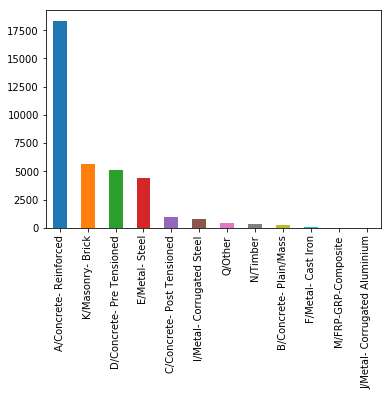

In [16]:
Material['prim_deck_elem_material'].value_counts().plot.bar()

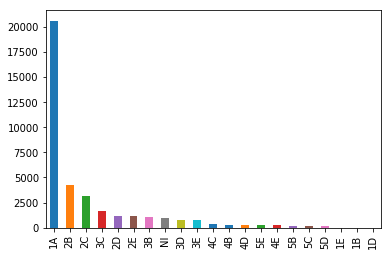

In [17]:
Material['grade_code'].value_counts().plot.bar()

In [18]:
mat_dict = {}

for i, struc in enumerate(Material['feature_id']):
    if struc in mat_dict:
        pass
    mat_dict[struc] = Material['prim_deck_elem_material'][i]


In [19]:
mat_count = pd.DataFrame(list(mat_dict.items()),
                      columns=['structure', 'material'])

In [20]:
per_struc = {}

for mat, struc in Material['prim_deck_elem_material'].value_counts().items():
    total = Material['prim_deck_elem_material'].value_counts()[mat]
    per = mat_count['material'].value_counts()[mat]
    per_struc[mat] = total / per

In [21]:
per_struc_df = pd.DataFrame(list(per_struc.items()),
                      columns=['material', 'per structure'])


In [27]:
sort(per_struc_df['material'], by

Object `sort` not found.


In [29]:
per_struc_df['material'].sortvalues?

Object `sortvalues` not found.


In [32]:
per_struc_df.sort_values(by=['per structure'], inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

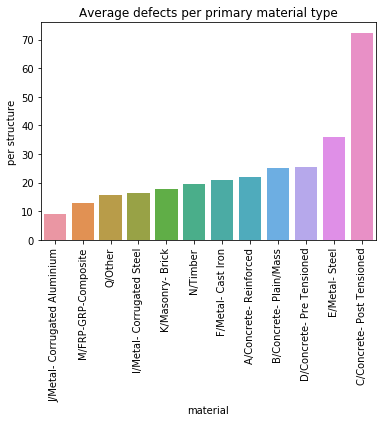

In [33]:


sns.barplot(x='material', y='per structure', data=per_struc_df)
plt.title('Average defects per primary material type')
plt.xticks(rotation=90)

Inspect the dataframe to see the columns

Keep only the columns we want and delete other columns with info we aren't after.

In [12]:
Cols_to_keep = ['feature_id', 'Name_x', 'Structure Type_x', 'Status_x', 'Easting',
                'Northing', 'Maintaining Agent_x', 'Construction Year', 'Hertitage',
                'critical_bci_x', 'length', 'carries', 'Crosses_x']

In [13]:
Merged = Merged[Cols_to_keep]

Tidy up column names

In [14]:
Cols_tidy = ['feature_id', 'Name', 'Structure Type', 'Status', 'Easting',
                'Northing', 'Maintaining Agent', 'Construction Year', 'Hertitage',
                'critical_bci', 'length', 'Carries', 'Crosses']

In [15]:
Merged.columns = Cols_tidy

In [16]:
Merged['Material'] = Merged['feature_id'].map(mat_dict)

#### Assign a length score to each bridge based on its length

In [17]:
Merged['Length Score'] = np.where(Merged['length'] <= 20, 2, 0)
Merged['Length Score'] = np.where(Merged['length'] > 20, 3, Merged['Length Score'])
Merged['Length Score'] = np.where(Merged['length'] >= 50, 4, Merged['Length Score'])
Merged['Length Score'] = np.where(Merged['length'] > 200, 5, Merged['Length Score'])

In [18]:
Merged.head()

feature_id                Name                 Structure Type Status  \
0     ST0001             BAYFORD                      S:Culvert   Live   
1     ST0002         BAYFORDBURY                 S:River Bridge   Live   
2     ST0003  BALLS PARK CULVERT                      S:Culvert   Live   
3     ST0004     BEDWELL CULVERT                      S:Culvert   Live   
4     ST0005      CATHARINE FARM  S:Pipe (Small Span Structure)   Live   

    Easting  Northing    Maintaining Agent Construction Year    Hertitage  \
0  530191.0  207688.0  HERTFORDSHIRE (STR)        01/01/1800  Not Present   
1  531567.0  211119.0  HERTFORDSHIRE (STR)        01/01/1972  Not Present   
2  533636.0  212321.0  HERTFORDSHIRE (STR)        01/01/1973  Not Present   
3  528596.0  207449.0  HERTFORDSHIRE (STR)        01/01/1920  Not Present   
4  520366.0  200833.0  HERTFORDSHIRE (STR)        01/01/1960  Not Present   

   critical_bci  length Carries               Crosses                Material  \
0         50.32    1.22    U191         Bayford Brook        K/Masonry- Brick   
1        100.00    4.27    B158         Bayford Brook  A/Concrete- Reinforced   
2        100.00    0.99    A414  Un-named Watercourse        K/Masonry- Brick   
3        100.00    1.91     C55  Un-named Watercourse  A/Concrete- Reinforced   
4        100.00    0.76     C84      Catherine Bourne  A/Concrete- Reinforced   

   Length Score  
0             2  
1             2  
2             2  
3             2  
4             2

#### Assign scores to each bridge based on what it carries and what it crosses.

Assign a score of 5 to any structures with structure type 'S:Rail Bridge'.

Use regular expressions to find A10-99 roads, A100-999 roads, A1000-9999 roads, and B roads and assign score accordingly.

All other structures are assigned a score of 1.

In [19]:
Merged['Crosses Score'] = np.where(Merged['Structure Type'] == 'S:Rail Bridge', 5, 1)
Merged['Crosses Score'] = np.where(Merged['Crosses'].str.contains(pat = '^A[0-9]{2}', regex = True), 5, Merged['Crosses Score'])
Merged['Crosses Score'] = np.where(Merged['Crosses'].str.contains(pat = '^A[0-9]{3}', regex = True), 4, Merged['Crosses Score'])
Merged['Crosses Score'] = np.where(Merged['Crosses'].str.contains(pat = '^A[0-9]{4}', regex = True), 3, Merged['Crosses Score'])
Merged['Crosses Score'] = np.where(Merged['Crosses'].str.contains(pat = '^B[0-9]', regex = True), 2, Merged['Crosses Score'])

In [20]:
Merged['Carries Score'] = np.where(Merged['Carries'].str.contains(pat = '^A[0-9]{2}', regex = True), 5, 1)
Merged['Carries Score'] = np.where(Merged['Carries'].str.contains(pat = '^A[0-9]{3}', regex = True), 4, Merged['Carries Score'])
Merged['Carries Score'] = np.where(Merged['Carries'].str.contains(pat = '^A[0-9]{4}', regex = True), 3, Merged['Carries Score'])
Merged['Carries Score'] = np.where(Merged['Carries'].str.contains(pat = '^B[0-9]', regex = True), 2, Merged['Carries Score'])

Check the columns and values again

In [21]:
Merged.head()

feature_id                Name                 Structure Type Status  \
0     ST0001             BAYFORD                      S:Culvert   Live   
1     ST0002         BAYFORDBURY                 S:River Bridge   Live   
2     ST0003  BALLS PARK CULVERT                      S:Culvert   Live   
3     ST0004     BEDWELL CULVERT                      S:Culvert   Live   
4     ST0005      CATHARINE FARM  S:Pipe (Small Span Structure)   Live   

    Easting  Northing    Maintaining Agent Construction Year    Hertitage  \
0  530191.0  207688.0  HERTFORDSHIRE (STR)        01/01/1800  Not Present   
1  531567.0  211119.0  HERTFORDSHIRE (STR)        01/01/1972  Not Present   
2  533636.0  212321.0  HERTFORDSHIRE (STR)        01/01/1973  Not Present   
3  528596.0  207449.0  HERTFORDSHIRE (STR)        01/01/1920  Not Present   
4  520366.0  200833.0  HERTFORDSHIRE (STR)        01/01/1960  Not Present   

   critical_bci  length Carries               Crosses                Material  \
0         50.32    1.22    U191         Bayford Brook        K/Masonry- Brick   
1        100.00    4.27    B158         Bayford Brook  A/Concrete- Reinforced   
2        100.00    0.99    A414  Un-named Watercourse        K/Masonry- Brick   
3        100.00    1.91     C55  Un-named Watercourse  A/Concrete- Reinforced   
4        100.00    0.76     C84      Catherine Bourne  A/Concrete- Reinforced   

   Length Score  Crosses Score  Carries Score  
0             2              1              1  
1             2              1              2  
2             2              1              4  
3             2              1              1  
4             2              1              1

#### Assign a 'Route Score' to each structure as the max of the Carries and Crosses scores

In [22]:
Merged['Route Score'] = Merged[['Carries Score', 'Crosses Score']].max(axis=1)

Check columns and values

In [23]:
Merged.head()

feature_id                Name                 Structure Type Status  \
0     ST0001             BAYFORD                      S:Culvert   Live   
1     ST0002         BAYFORDBURY                 S:River Bridge   Live   
2     ST0003  BALLS PARK CULVERT                      S:Culvert   Live   
3     ST0004     BEDWELL CULVERT                      S:Culvert   Live   
4     ST0005      CATHARINE FARM  S:Pipe (Small Span Structure)   Live   

    Easting  Northing    Maintaining Agent Construction Year    Hertitage  \
0  530191.0  207688.0  HERTFORDSHIRE (STR)        01/01/1800  Not Present   
1  531567.0  211119.0  HERTFORDSHIRE (STR)        01/01/1972  Not Present   
2  533636.0  212321.0  HERTFORDSHIRE (STR)        01/01/1973  Not Present   
3  528596.0  207449.0  HERTFORDSHIRE (STR)        01/01/1920  Not Present   
4  520366.0  200833.0  HERTFORDSHIRE (STR)        01/01/1960  Not Present   

   critical_bci  length Carries               Crosses                Material  \
0         50.32    1.22    U191         Bayford Brook        K/Masonry- Brick   
1        100.00    4.27    B158         Bayford Brook  A/Concrete- Reinforced   
2        100.00    0.99    A414  Un-named Watercourse        K/Masonry- Brick   
3        100.00    1.91     C55  Un-named Watercourse  A/Concrete- Reinforced   
4        100.00    0.76     C84      Catherine Bourne  A/Concrete- Reinforced   

   Length Score  Crosses Score  Carries Score  Route Score  
0             2              1              1            1  
1             2              1              2            2  
2             2              1              4            4  
3             2              1              1            1  
4             2              1              1            1

#### Assign a 'BCI Score' to each structure based on their BCI value

In [24]:
Merged['BCI Score'] = np.where(Merged['critical_bci'] <= 40, 5, 5)
Merged['BCI Score'] = np.where(Merged['critical_bci'] > 40, 4, Merged['BCI Score'])
Merged['BCI Score'] = np.where(Merged['critical_bci'] > 65, 3, Merged['BCI Score'])
Merged['BCI Score'] = np.where(Merged['critical_bci'] > 80, 2, Merged['BCI Score'])
Merged['BCI Score'] = np.where(Merged['critical_bci'] > 90, 1, Merged['BCI Score'])

In [25]:
Merged.head(-5)

feature_id                                         Name  \
0        ST0001                                      BAYFORD   
1        ST0002                                  BAYFORDBURY   
2        ST0003                           BALLS PARK CULVERT   
3        ST0004                              BEDWELL CULVERT   
4        ST0005                               CATHARINE FARM   
5        ST0006                                   BULLS MILL   
6        ST0007                                    COWBRIDGE   
7        ST0008                                PANTHERS WOOD   
8        ST0009                        GOLDINGS SOUTH BRIDGE   
9        ST0010                      GOLDINGS CENTRAL BRIDGE   
10       ST0011                        GOLDINGS NORTH BRIDGE   
11       ST0012                       GOLDINGS SOUTH CULVERT   
12       ST0013                     GOLDINGS CENTRAL CULVERT   
13       ST0014                       GOLDINGS NORTH CULVERT   
14    ST0015 FB           HATFIELD BUSH HALL LANE FOOTBRIDGE   
15    ST0015 RB                      HATFIELD BUSH HALL LANE   
16       ST0016                         HERTINGFORDBURY MILL   
17       ST0017                                      HOLWELL   
18       ST0018                                 JENNINGSBURY   
19       ST0019                                LEMSFORD MILL   
20       ST0021                                POPLARS GREEN   
21       ST0022                           WESTMILL TROUT RIB   
22       ST0023                                      ROXFORD   
23       ST0024                                  STANBOROUGH   
24       ST0025                                TOWNSEND ARMS   
25       ST0026                                   COLE GREEN   
26       ST0027                                   WATER HALL   
27       ST0028                             WOOLMERS CULVERT   
28       ST0029                                     WOOLMERS   
29       ST0030                                  DANE BRIDGE   
...         ...                                          ...   
2488     ST2480                ESSEX ROAD NEW RAILWAY BRIDGE   
2489   ST2480 E  ESSEX ROAD NEW RAILWAY BRIDGE EAST APPROACH   
2490   ST2480 W  ESSEX ROAD NEW RAILWAY BRIDGE WEST APPROACH   
2491     ST2481                         JACK OLDINGS CULVERT   
2492     ST2483       A412 RICKY ROAD CRIB WALL (TINGS WALL)   
2493     ST2483       A412 RICKY ROAD CRIB WALL (TINGS WALL)   
2494     ST2482        ST MARY'S SCHOOL NEW RIVER FOOTBRIDGE   
2495     ST2483                    A412 RICKY ROAD CRIB WALL   
2496     ST2483                    A412 RICKY ROAD CRIB WALL   
2497     ST2484                       CORNFLOWER WAY CULVERT   
2498     ST2485                    IVY WALK CYCLEWAY CULVERT   
2499     ST2486                  LAVENDER CLOSE PATH CULVERT   
2500     ST2487                         STEWART PLACE BRIDGE   
2501     ST2488                 BUNKERS LANE RETAINNING WALL   
2502     ST2489                    BUNKERS LANE PORTAL FRAME   
2503     ST2490               SOUTHMILL CANAL RETAINING WALL   
2504     ST2491                          DOLPHIN WAY CULVERT   
2505     ST2493                       PRESTWICK ROAD CULVERT   
2506     ST2494                        SILK MILL WAY CULVERT   
2507     ST2495                          PONDSIDE FOOTBRIDGE   
2508     ST2496                    WOOLGROVE ROAD FOOTBRIDGE   
2509     ST2497                         THELE AVENUE CULVERT   
2510     ST2498                        ALDENHAM PARK CULVERT   
2511     ST2499                HOMESTEAD ROAD RETAINING WALL   
2512     ST2500                      WAITROSE RETAINING WALL   
2513     ST2501             THOMAS SAWYER WAY RAILWAY BRIDGE   
2514  ST2501 NE                    THOMAS SAWYER WAY NE BANK   
2515  ST2501 SE                    THOMAS SAWYER WAY SE BANK   
2516  ST2501 NW                    THOMAS SAWYER WAY NW BANK   
2517  ST2501 SW                    THOMAS SAWYER WAY SW BANK   

                     Structure Type 

In [26]:
Merged['Year'] = pd.to_datetime(Merged['Construction Year'], errors='coerce', infer_datetime_format=True)


In [27]:
Merged['Year'] = Merged['Year'].dt.year

In [28]:
Merged['Material'].unique()

array(['K/Masonry- Brick', 'A/Concrete- Reinforced',
       'D/Concrete- Pre Tensioned', nan, 'E/Metal- Steel',
       'I/Metal- Corrugated Steel', 'Q/Other', 'B/Concrete- Plain/Mass',
       'M/FRP-GRP-Composite', 'F/Metal- Cast Iron',
       'C/Concrete- Post Tensioned', 'N/Timber',
       'J/Metal- Corrugated Aluminium'], dtype=object)

In [29]:
Merged['Material Score'] = np.where(Merged['Material'] == 'K/Masonry- Brick', 1, 5)
Merged['Material Score'] = np.where(Merged['Material'] == ('A/Concrete- Reinforced' or 'D/Concrete- Pre Tensioned' or 'B/Concrete- Plain/Mass'), 2, Merged['Material Score'])
Merged.loc[(Merged['Material'].isin(['A/Concrete- Reinforced', 'D/Concrete- Pre Tensioned', 'B/Concrete- Plain/Mass'])) & (Merged['Year'] < 1950), ['Material Score']] = 5
Merged['Material Score'] = np.where(Merged['Material'] == ('E/Metal- Steel' or 'I/Metal- Corrugated Steel' or 'J/Metal- Corrugated Aluminium'), 2, Merged['Material Score'])
Merged.loc[(Merged['Material'].isin(['E/Metal- Steel', 'I/Metal- Corrugated Steel', 'J/Metal- Corrugated Aluminium'])) & (Merged['Year'] < 1930), ['Material Score']] = 5
Merged['Material Score'] = np.where(Merged['Material'] == 'C/Concrete- Post Tensioned', 4, Merged['Material Score'])

In [30]:
Merged.head()

feature_id                Name                 Structure Type Status  \
0     ST0001             BAYFORD                      S:Culvert   Live   
1     ST0002         BAYFORDBURY                 S:River Bridge   Live   
2     ST0003  BALLS PARK CULVERT                      S:Culvert   Live   
3     ST0004     BEDWELL CULVERT                      S:Culvert   Live   
4     ST0005      CATHARINE FARM  S:Pipe (Small Span Structure)   Live   

    Easting  Northing    Maintaining Agent Construction Year    Hertitage  \
0  530191.0  207688.0  HERTFORDSHIRE (STR)        01/01/1800  Not Present   
1  531567.0  211119.0  HERTFORDSHIRE (STR)        01/01/1972  Not Present   
2  533636.0  212321.0  HERTFORDSHIRE (STR)        01/01/1973  Not Present   
3  528596.0  207449.0  HERTFORDSHIRE (STR)        01/01/1920  Not Present   
4  520366.0  200833.0  HERTFORDSHIRE (STR)        01/01/1960  Not Present   

   critical_bci       ...        Carries               Crosses  \
0         50.32       ...           U191         Bayford Brook   
1        100.00       ...           B158         Bayford Brook   
2        100.00       ...           A414  Un-named Watercourse   
3        100.00       ...            C55  Un-named Watercourse   
4        100.00       ...            C84      Catherine Bourne   

                 Material Length Score  Crosses Score  Carries Score  \
0        K/Masonry- Brick            2              1              1   
1  A/Concrete- Reinforced            2              1              2   
2        K/Masonry- Brick            2              1              4   
3  A/Concrete- Reinforced            2              1              1   
4  A/Concrete- Reinforced            2              1              1   

   Route Score  BCI Score    Year  Material Score  
0            1          4  1800.0               1  
1            2          1  1972.0               2  
2            4          1  1973.0               1  
3            1          1  1920.0               5  
4            1          1  1960.0               2  

[5 rows x 21 columns]

### Set the maximum importance for all minor structures (walls, gantries etc.) to be 10

First check the list of unique structure types

In [31]:
# List the unique structure types
Struc_uniq = Merged['Structure Type'].unique()
Struc_uniq

array(['S:Culvert', 'S:River Bridge', 'S:Pipe (Small Span Structure)',
       'S:Footbridge', 'S:Road Bridge', 'S:Rail Bridge', 'S:Subway',
       'S:Retaining Wall', 'S:Viaduct', 'S:Sign/Gantry', 'S:Other',
       'S:Underpass', 'S:Tunnel', 'S:Embankment'], dtype=object)

In [32]:
Limit_score = ['S:Pipe (Small Span Structure)', 'S:Retaining Wall', 'S:Sign/Gantry', 'S:Other','S:Embankment']

Select the structure types we want to limit to importance of 10 and save them in a list 'Limit_score'.

In [33]:
Merged['Importance'] = Merged['Length Score']*Merged['Route Score']

In [34]:
Merged['Severity'] = Merged['BCI Score']*Merged['Material Score']

Check the values of the minor structures and if they go beyond 10

In [35]:
Merged.loc[(Merged['Structure Type'].isin(Limit_score)), ['Importance']].describe()

Importance
count  476.000000
mean     4.840336
std      4.945996
min      2.000000
25%      2.000000
50%      2.000000
75%      6.000000
max     25.000000

Select the cells where 'Structure Type' is in the Limit_score list AND the importance is greater than 10, then set those values to 10.

In [36]:
Merged.loc[(Merged['Structure Type'].isin(Limit_score)) & (Merged['Importance'] > 10), ['Importance']] = 10

Check the importance values of the minor structures

In [37]:
Merged.loc[(Merged['Structure Type'].isin(Limit_score)), ['Importance']].describe()

Importance
count  476.000000
mean     4.054622
std      2.946034
min      2.000000
25%      2.000000
50%      2.000000
75%      6.000000
max     10.000000

As can be seen the maximum values have now been limited to 10

In [38]:
Merged['Critical'] = np.where(Merged['Importance'] >= 20, True, False)

In [39]:
Merged['Total Score'] = Merged['Importance'] * Merged['Severity']

In [40]:
Merged['Radius'] = 10*Merged['Importance']**1.5+100

Extract values from the dataframe we want to plot.

Importance is a score based on the length and route score of the structure.

Severity is the score based on BCI

## Merge the lat and long data from Google Import

In [41]:
# Extract the data we're interested in
East = Merged['Easting'].values
North = Merged['Northing'].values
Importance = Merged['Importance'].values
Severity = Merged['Severity'].values
Total_score = Merged['Total Score'].values
Names = Merged['feature_id'].values

As the data we have has eastings and northings and not latitudes and longitudes convert the eastings and northings

### Note although Bokeh says to convert to Mercator projection for map tiles, the actual projection is web-mercator, therefore use GOOGLE_MERCATOR

In [42]:
bridge_crs = ccrs.OSGB()
merc = ccrs.GOOGLE_MERCATOR
bridge_lat = []
bridge_lon = []
for es, nth in zip(East, North):
    x, y = merc.transform_point(es, nth, bridge_crs)
    bridge_lon.append(x)
    bridge_lat.append(y)


In [43]:
Merged['Latitude'] = bridge_lat
Merged['Longitude'] = bridge_lon
Merged.head()

feature_id                Name                 Structure Type Status  \
0     ST0001             BAYFORD                      S:Culvert   Live   
1     ST0002         BAYFORDBURY                 S:River Bridge   Live   
2     ST0003  BALLS PARK CULVERT                      S:Culvert   Live   
3     ST0004     BEDWELL CULVERT                      S:Culvert   Live   
4     ST0005      CATHARINE FARM  S:Pipe (Small Span Structure)   Live   

    Easting  Northing    Maintaining Agent Construction Year    Hertitage  \
0  530191.0  207688.0  HERTFORDSHIRE (STR)        01/01/1800  Not Present   
1  531567.0  211119.0  HERTFORDSHIRE (STR)        01/01/1972  Not Present   
2  533636.0  212321.0  HERTFORDSHIRE (STR)        01/01/1973  Not Present   
3  528596.0  207449.0  HERTFORDSHIRE (STR)        01/01/1920  Not Present   
4  520366.0  200833.0  HERTFORDSHIRE (STR)        01/01/1960  Not Present   

   critical_bci      ...       BCI Score    Year Material Score Importance  \
0         50.32      ...               4  1800.0              1          2   
1        100.00      ...               1  1972.0              2          4   
2        100.00      ...               1  1973.0              1          8   
3        100.00      ...               1  1920.0              5          2   
4        100.00      ...               1  1960.0              2          2   

   Severity  Critical  Total Score      Radius      Latitude     Longitude  
0         4     False            8  128.284271  6.755545e+06 -12837.313030  
1         2     False            8  180.000000  6.761033e+06 -10475.044382  
2         1     False            8  326.274170  6.762889e+06  -7086.686472  
3         5     False           10  128.284271  6.755225e+06 -15417.910820  
4         2     False            4  128.284271  6.744868e+06 -28937.250734  

[5 rows x 28 columns]

#### Save the dataframe to csv

In [44]:
Merged.to_csv('Bridges.csv')

Create function to scatter plot the bridges with colour based on 'Severity' and size based on 'Importance'

In [45]:
Merged.columns

Index(['feature_id', 'Name', 'Structure Type', 'Status', 'Easting', 'Northing',
       'Maintaining Agent', 'Construction Year', 'Hertitage', 'critical_bci',
       'length', 'Carries', 'Crosses', 'Material', 'Length Score',
       'Crosses Score', 'Carries Score', 'Route Score', 'BCI Score', 'Year',
       'Material Score', 'Importance', 'Severity', 'Critical', 'Total Score',
       'Radius', 'Latitude', 'Longitude'],
      dtype='object')

## Create a new dataset sorted by priority score

In [46]:
DF_Sorted = Merged.sort_values(by=['Total Score'])

In [47]:
DF_Sorted[-5:]

feature_id                    Name Structure Type Status   Easting  \
712      ST0736          HUNTERS BRIDGE  S:Rail Bridge   Live  524030.0   
1961     ST1953       RIVER LEA VIADUCT      S:Viaduct   Live  538469.0   
840      ST0864  WALTHAM CROSS ROAD RLY  S:Rail Bridge   Live  536523.0   
790      ST0819  20th MILE SOUTH BRIDGE  S:Rail Bridge   Live  523722.0   
1485     ST1469       KINGSMEAD VIADUCT      S:Viaduct   Live  534746.0   

      Northing    Maintaining Agent Construction Year    Hertitage  \
712   213116.0  HERTFORDSHIRE (STR)        01/01/1961  Not Present   
1961  210977.0  HERTFORDSHIRE (STR)        01/01/1987  Not Present   
840   200373.0  HERTFORDSHIRE (STR)        01/01/1981  Not Present   
790   212079.0  HERTFORDSHIRE (STR)        01/01/1968  Not Present   
1485  213512.0  HERTFORDSHIRE (STR)        01/01/1975  Not Present   

      critical_bci      ...       BCI Score    Year Material Score Importance  \
712          58.00      ...               4  1961.0              5         15   
1961         58.00      ...               4  1987.0              4         20   
840           0.00      ...               5  1981.0              5         15   
790          58.00      ...               4  1968.0              5         20   
1485         55.48      ...               4  1975.0              4         25   

      Severity  Critical  Total Score       Radius      Latitude     Longitude  
712         20     False          300   680.947502  6.764572e+06 -22552.033814  
1961        16      True          320   994.427191  6.760504e+06    649.779816  
840         25     False          375   680.947502  6.743463e+06  -2950.986685  
790         20      True          400   994.427191  6.762907e+06 -23090.176316  
1485        16      True          400  1350.000000  6.764767e+06  -5244.625333  

[5 rows x 28 columns]

# Bokeh testing

In [48]:
import holoviews as hv
from bokeh.plotting import figure, output_file, show
from bokeh.models.glyphs import Rect
from bokeh.io import output_notebook
from bokeh.models import HoverTool, Panel, Legend
from bokeh.models import ColumnDataSource, CDSView, BooleanFilter
from bokeh.models import LinearColorMapper, ColorBar, BasicTicker, PrintfTickFormatter, CustomJS, CategoricalColorMapper
from bokeh.models.widgets import CheckboxGroup, CheckboxButtonGroup, Slider, Tabs, TextInput
from bokeh.models.widgets import Button, RangeSlider, Dropdown, DataTable, TableColumn
from bokeh.layouts import column, row, WidgetBox
from bokeh.models import Title
from bokeh.layouts import gridplot
from bokeh.tile_providers import CARTODBPOSITRON_RETINA, STAMEN_TERRAIN, CARTODBPOSITRON
import matplotlib as mpl
from collections import OrderedDict
from bokeh.io import curdoc
from bokeh.palettes import Category20

from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application
output_notebook()

Loading BokehJS ...

In [42]:
from bokeh.plotting import figure, show, output_file
from bokeh.tile_providers import CARTODBPOSITRON

output_file("tile.html")

# range bounds supplied in web mercator coordinates
p = figure(x_range=(-2000000, 6000000), y_range=(-1000000, 7000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(STAMEN_TERRAIN)

show(p)

In [50]:
from bokeh.models import WMTSTileSource

## Non-critical bridges

In [35]:
# prepare some data

x = Merged['Easting'].values
y = Merged['Northing'].values
axis_range = x.max()-x.min()
half_range = axis_range/2
y_mid = y.max() - (y.max()-y.min())/2
radii = Importance**2
color_list = [i for i in range(1, 101)]
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*mpl.cm.jet(mpl.colors.Normalize()(color_list))
]
map = {i:clr for i, clr in enumerate(colors)}


TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select,hover"

source = ColumnDataSource(Merged[Merged['Importance'] < 20])
# source2 = ColumnDataSource(Merged[Merged['Importance'] >= 20])
# s2 = ColumnDataSource(data={key: [] for key in Merged.keys()})

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(x.min()-100, x.max()+100), y_range=(y.min()-100, y.max()+100), toolbar_location='below')

# p.add_tile(STAMEN_TERRAIN)

mapper = LinearColorMapper(palette=colors, low=1, high=400)

# add a circle renderer with vectorized colors and sizes
p.circle('Easting', 'Northing', source=source, radius='Radius', hover_color='red',
         fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.3, hover_alpha=0.8, line_color=None)

# p_filtered = figure(tools=TOOLS, x_range=p.x_range, y_range=p.y_range, toolbar_location='below')
# p_filtered.circle('Easting', 'Northing', source=source2, radius='Radius', hover_color='red',
#          fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.3, hover_alpha=0.8, line_color=None)

p.title.text = "Non-critical bridges"
p.title.align = "center"
p.title.text_color = "black"
p.title.text_font_size = "25px"



p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "0pt"
p.axis.major_label_standoff = 0

# p_filtered.title.text = "Critical Bridges"
# p_filtered.title.align = "center"
# p_filtered.title.text_color = "black"
# p_filtered.title.text_font_size = "25px"

# p_filtered.axis.major_tick_line_color = None
# p_filtered.axis.major_label_text_font_size = "0pt"
# p_filtered.axis.major_label_standoff = 0



TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover"

hover =p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("Struct ID", "@feature_id"),
    ("Name", "@Name"),
    ("Importance", "@Importance"),
    ("BCI", "@Severity")])


color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=int(len(colors)/5)),
                     label_standoff=6, border_line_color=None, location=(0, 0))


p.add_layout(color_bar, 'right')
# p_filtered.add_layout(color_bar2, 'right')

def radius_callback(source=source, window=None):
    f=cb_obj.value
    data = source.data
    Imp = data['Importance']
    rad = data['Radius']
    for i in range(len(rad)):
        rad[i] = f*Imp[i]**1.5+100
    source.change.emit()

# Slider to select the radius scaler, value is selected number
radius_select = Slider(start = 0, end = 10, 
                     step = 0.1, value = 1,
                     title = 'Radius scaler',
                       callback=CustomJS.from_py_func(radius_callback))



# Update the plot when the value is changed
# radius_select.on_change('value', update)

# def callback(source=source):
#     data = source.data
#     f = cb_obj.active
#     struc = data['Structure Type']
#     imp = data['Importance']
#     for i in range(len(imp)):
#         if struc[i] in f:
#             data['Importance'] = 0
#             data['Radius'] = 0
#     source.change.emit()

# struc_selection = CheckboxGroup(labels=list(Merged['Structure Type'].unique()),
#                                 active=[i for i in range(len(Merged['Structure Type'].unique()))], callback=CustomJS.from_py_func(struc_callback))


# struc_selection.on_change('active', struc_callback)

# def struc_callback(source=source, window=None):
#     act = [cb_obj.labels[i] for i in cb_obj.active]
#     data = source.data
#     Imp = data['Importance']
#     rad = data['Radius']
#     for i in range(len(rad)):
#         rad[i] = f*Imp[i]**2+100
#     source.change.emit()

# crit_select = Button(
#         label="Critical", button_type="success", callback=CustomJS.from_py_func(crit_callback))

# crit_select.js_on_click(crit_callback)

# crit_callback = CustomJS(args=dict(s2=s2), code="""
#         var inds = cb_obj.selected.indices;
#         var d1 = cb_obj.data;
#         var d2 = s2.data;
#         d2['x'] = []
#         d2['y'] = []
#         for (var i = 0; i < inds.length; i++) {
#             d2['x'].push(d1['x'][inds[i]])
#             d2['y'].push(d1['y'][inds[i]])
#         }
#         s2.change.emit();
#     """)

# crit_select.on_change('active', update)

# Put controls in a single element
controls = WidgetBox(radius_select)

# Create a row layout

layout = row(controls, p)

# tab1 = Panel(child=layout1, title="Non-Critical")

# tab2 = Panel(child=layout2, title="Critical")

# tabs = Tabs(tabs=[ tab1, tab2 ])

output_file("HCC Bridges non crit.html")

# show the results
# show(gridplot([[p, p_filtered]]))
show(layout)

## Range of importance

In [51]:
# prepare some data

x = Merged['Easting'].values
y = Merged['Northing'].values
axis_range = x.max()-x.min()
half_range = axis_range/2
y_mid = y.max() - (y.max()-y.min())/2
radii = Importance**2
color_list = [i for i in range(1, 101)]
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*mpl.cm.jet(mpl.colors.Normalize()(color_list))
]
map = {i:clr for i, clr in enumerate(colors)}


TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select,hover"

source = ColumnDataSource(DF_Sorted)
# source2 = ColumnDataSource(Merged[Merged['Importance'] >= 20])
s2 = ColumnDataSource(DF_Sorted)

s3 = ColumnDataSource({'x': [], 'y': [], 'width': [], 'height': []})

jscode="""
    var data = source.data;
    var start = cb_obj.start;
    var end = cb_obj.end;
    data['%s'] = [start + (end - start) / 2];
    data['%s'] = [end - start];
    source.change.emit();
"""

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(x.min()-100, x.max()+100), y_range=(y.min()-100, y.max()+100), toolbar_location='below')

# p.add_tile(STAMEN_TERRAIN)

mapper = LinearColorMapper(palette=colors, low=1, high=400)

# add a circle renderer with vectorized colors and sizes
p.circle('Easting', 'Northing', source=s2, radius='Radius', hover_color='red',
         fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.5, hover_alpha=0.8, line_color=None)


p.title.text = "HCC bridges"
p.title.align = "center"
p.title.text_color = "black"
p.title.text_font_size = "25px"

p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "0pt"
p.axis.major_label_standoff = 0

p.add_layout(Title(text="Colour Bar = Priority Score", align="center"), "right")

p.x_range.callback = CustomJS(
        args=dict(source=s3), code=jscode % ('x', 'width'))
p.y_range.callback = CustomJS(
        args=dict(source=s3), code=jscode % ('y', 'height'))

# create a new plot with the tools above, and explicit ranges
p2 = figure(tools='', x_range=(x.min()-100, x.max()+100), y_range=(y.min()-100, y.max()+100), toolbar_location='below')

# add a circle renderer with vectorized colors and sizes
p2.circle('Easting', 'Northing', source=source, radius='Radius', hover_color='red',
         fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.5, hover_alpha=0.8, line_color=None)

# p_filtered = figure(tools=TOOLS, x_range=p.x_range, y_range=p.y_range, toolbar_location='below')
# p_filtered.circle('Easting', 'Northing', source=source2, radius='Radius', hover_color='red',
#          fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.3, hover_alpha=0.8, line_color=None)

p2.title.text = "See Zoom Window Here"
p2.title.align = "center"
p2.title.text_color = "black"
p2.title.text_font_size = "25px"

p2.axis.major_tick_line_color = None
p2.axis.major_label_text_font_size = "0pt"
p2.axis.major_label_standoff = 0

rect = Rect(x='x', y='y', width='width', height='height', fill_alpha=0.1,
            line_color='black', fill_color='black')

p2.add_glyph(s3, rect)

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover"

hover =p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("Struct ID", "@feature_id"),
    ("Name", "@Name"),
    ("Importance", "@Importance"),
    ("BCI", "@Severity")])


color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=int(len(colors)/5)),
                     label_standoff=6, border_line_color=None, location=(0, 0))



p.add_layout(color_bar, 'right')
# p_filtered.add_layout(color_bar2, 'right')

def radius_callback(source=s2, window=None):
    f=cb_obj.value
    data = source.data
    Imp = data['Importance']
    rad = data['Radius']
    for i in range(len(rad)):
        rad[i] = f*Imp[i]**1.5+100
    source.change.emit()

# Slider to select the radius scaler, value is selected number
radius_select = Slider(start = 0, end = 20, 
                     step = 0.1, value = 10,
                     title = 'Radius scaler',
                       callback=CustomJS.from_py_func(radius_callback))

def range_callback(source=source, s2=s2, window=None):
    columns = ['feature_id', 'Name', 'Structure Type', 'Status', 'Easting', 'Northing',
               'Maintaining Agent', 'Construction Year', 'Hertitage', 'critical_bci',
               'length', 'Carries', 'Crosses', 'Length Score', 'Crosses Score',
               'Carries Score', 'Route Score', 'BCI Score', 'Importance', 'Severity',
               'Total Score', 'Latitude', 'Longitude', 'Critical', 'Radius']
    data = source.data
    data2 = s2.data        
    range_start = int(cb_obj.value[0])
    range_end = int(cb_obj.value[1])
    assert range_end > range_start
    for name in columns:
        data2[name] = []
    for name in columns:
        for i in range(range_start, range_end):
            data2[name].append(data[name][i])
    s2.change.emit()

selection = RangeSlider(start=1, end=2523, value=(1,2523), step=1, title="Structures",
                       callback=CustomJS.from_py_func(range_callback))



str0 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:River Bridge'])
str1 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Culvert'])
str2 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Subway'])
str3 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Footbridge'])
str4 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Retaining Wall'])
str5 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Pipe (Small Span Structure)'])
str6 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Sign/Gantry'])
str7 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Road Bridge'])
str8 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Viaduct'])
str9 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Underpass'])
str10 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Other'])
str11 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Embankment'])
str12 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Tunnel'])
str13 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Rail Bridge'])


def struc_callback(source=source, s2=s2, str0=str0, str1=str1, str3=str3, str4=str4,
                   str5=str5, str6=str6, str7=str7, str8=str8, str9=str9, str10=str10,
                   str11=str11, str12=str12, str13=str13, window=None):
    data = source.data
    data2 = s2.data
    length = len(data2['Structure Type'])
    value = cb_obj.value
    columns = ['feature_id', 'Name', 'Structure Type', 'Status', 'Easting', 'Northing',
               'Maintaining Agent', 'Construction Year', 'Hertitage', 'critical_bci',
               'length', 'Carries', 'Crosses', 'Length Score', 'Crosses Score',
               'Carries Score', 'Route Score', 'BCI Score', 'Importance', 'Severity',
               'Total Score', 'Latitude', 'Longitude', 'Critical', 'Radius']
    for name in columns:
        data2[name] = []
    for name in columns:
        for i in range(length):
            if value == 'S:River Bridge':
                data2[name] = str0.data[name]
            if value == 'S:Culvert':
                data2[name] = str1.data[name]
            if value == 'S:Subway':
                data2[name] = str2.data[name]
            if value == 'S:Footbridge':
                data2[name] = str3.data[name]
            if value == 'S:Retaining Wall':
                data2[name] = str4.data[name]
            if value == 'S:Pipe (Small Span Structure)':
                data2[name] = str5.data[name]
            if value == 'S:Sign/Gantry':
                data2[name] = str6.data[name]
            if value == 'S:Road Bridge':
                data2[name] = str7.data[name]
            if value == 'S:Viaduct':
                data2[name] = str8.data[name]
            if value == 'S:Underpass':
                data2[name] = str9.data[name]
            if value == 'S:Other':
                data2[name] = str10.data[name]
            if value == 'S:Embankment':
                data2[name] = str11.data[name]
            if value == 'S:Tunnel':
                data2[name] = str12.data[name]
            if value == 'S:Rail Bridge':
                data2[name] = str13.data[name]
            if value == 'All':
                data2[name] = data[name]
    s2.change.emit()

menu = [(struc, struc) for struc in DF_Sorted['Structure Type'].unique()]
menu.append(('All', 'All'))

struc_labels =[struc for struc in DF_Sorted['Structure Type'].unique()]

dropdown = Dropdown(label='Structure Type', menu=menu, button_type="success", callback=CustomJS.from_py_func(struc_callback))      


wanted_columns = ['feature_id', 'Name', 'Structure Type', 'critical_bci',
               'length', 'Carries', 'Crosses', 'Length Score', 'Crosses Score',
               'Carries Score', 'Route Score', 'BCI Score', 'Importance',
               'Total Score']
columns = [TableColumn(field=str(value), title=value) for value in wanted_columns]
data_table = DataTable(source=source, columns=columns, width=1200, height=1000)


# Put controls in a single element
controls = WidgetBox(radius_select, selection, dropdown)

# Create a row layout

layout = row(controls, p, p2)

tab1 = Panel(child=layout, title="Plots")

tab2 = Panel(child=data_table, title="Data")

tabs = Tabs(tabs=[ tab1, tab2 ])

output_file("HCC Bridges Plot - NR.html")

# show the results
# show(gridplot([[p, p_filtered]]))
show(tabs)

## Plot with Mercator projection and map background

In [52]:
# prepare some data

x = DF_Sorted['Longitude'].values
y = DF_Sorted['Latitude'].values
axis_range = x.max()-x.min()
half_range = axis_range/2
y_mid = y.max() - (y.max()-y.min())/2
radii = Importance**2
color_list = [i for i in range(1, 101)]
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*mpl.cm.jet(mpl.colors.Normalize()(color_list))
]
map = {i:clr for i, clr in enumerate(colors)}


TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select,hover"

source = ColumnDataSource(DF_Sorted)
# source2 = ColumnDataSource(Merged[Merged['Importance'] >= 20])
s2 = ColumnDataSource(DF_Sorted)

s3 = ColumnDataSource({'x': [], 'y': [], 'width': [], 'height': []})

jscode="""
    var data = source.data;
    var start = cb_obj.start;
    var end = cb_obj.end;
    data['%s'] = [start + (end - start) / 2];
    data['%s'] = [end - start];
    source.change.emit();
"""

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(x.min()-100, x.max()+100), y_range=(y.min()-100, y.max()+100), toolbar_location='below',
          x_axis_type="mercator", y_axis_type="mercator")

p.add_tile(CARTODBPOSITRON_RETINA)

mapper = LinearColorMapper(palette=colors, low=1, high=400)

# add a circle renderer with vectorized colors and sizes
p.circle('Longitude', 'Latitude', source=s2, radius='Radius', hover_color='red',
         fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.5, hover_alpha=0.8, line_color=None)


p.title.text = "HCC bridges"
p.title.align = "center"
p.title.text_color = "black"
p.title.text_font_size = "25px"

p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "0pt"
p.axis.major_label_standoff = 0

p.add_layout(Title(text="Colour Bar = Priority Score", align="center"), "right")

p.x_range.callback = CustomJS(
        args=dict(source=s3), code=jscode % ('x', 'width'))
p.y_range.callback = CustomJS(
        args=dict(source=s3), code=jscode % ('y', 'height'))

# create a new plot with the tools above, and explicit ranges
p2 = figure(tools='', x_range=(x.min()-100, x.max()+100), y_range=(y.min()-100, y.max()+100), toolbar_location='below',
           x_axis_type="mercator", y_axis_type="mercator")

p2.add_tile(CARTODBPOSITRON_RETINA)

# add a circle renderer with vectorized colors and sizes
p2.circle('Longitude', 'Latitude', source=source, radius='Radius', hover_color='red',
         fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.5, hover_alpha=0.8, line_color=None)

# p_filtered = figure(tools=TOOLS, x_range=p.x_range, y_range=p.y_range, toolbar_location='below')
# p_filtered.circle('Easting', 'Northing', source=source2, radius='Radius', hover_color='red',
#          fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.3, hover_alpha=0.8, line_color=None)

p2.title.text = "See Zoom Window Here"
p2.title.align = "center"
p2.title.text_color = "black"
p2.title.text_font_size = "25px"

p2.axis.major_tick_line_color = None
p2.axis.major_label_text_font_size = "0pt"
p2.axis.major_label_standoff = 0

rect = Rect(x='x', y='y', width='width', height='height', fill_alpha=0.1,
            line_color='black', fill_color='black')

p2.add_glyph(s3, rect)

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover"

hover =p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("Struct ID", "@feature_id"),
    ("Name", "@Name"),
    ("Importance", "@Importance"),
    ("BCI", "@Severity")])


color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=int(len(colors)/5)),
                     label_standoff=6, border_line_color=None, location=(0, 0))



p.add_layout(color_bar, 'right')
# p_filtered.add_layout(color_bar2, 'right')

def radius_callback(source=s2, window=None):
    f=cb_obj.value
    data = source.data
    Imp = data['Importance']
    rad = data['Radius']
    for i in range(len(rad)):
        rad[i] = f*Imp[i]**1.5+100
    source.change.emit()

# Slider to select the radius scaler, value is selected number
radius_select = Slider(start = 0, end = 30, 
                     step = 0.1, value = 10,
                     title = 'Radius scaler',
                       callback=CustomJS.from_py_func(radius_callback))

def range_callback(source=source, s2=s2, window=None):
    columns = ['feature_id', 'Name', 'Structure Type', 'Status', 'Easting', 'Northing',
               'Maintaining Agent', 'Construction Year', 'Hertitage', 'critical_bci',
               'length', 'Carries', 'Crosses', 'Length Score', 'Crosses Score',
               'Carries Score', 'Route Score', 'BCI Score', 'Importance', 'Severity',
               'Total Score', 'Latitude', 'Longitude', 'Critical', 'Radius']
    data = source.data
    data2 = s2.data        
    range_start = int(cb_obj.value[0])
    range_end = int(cb_obj.value[1])
    assert range_end > range_start
    for name in columns:
        data2[name] = []
    for name in columns:
        for i in range(range_start, range_end):
            data2[name].append(data[name][i])
    s2.change.emit()

selection = RangeSlider(start=1, end=2523, value=(1,2523), step=1, title="Structures",
                       callback=CustomJS.from_py_func(range_callback))



str0 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:River Bridge'])
str1 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Culvert'])
str2 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Subway'])
str3 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Footbridge'])
str4 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Retaining Wall'])
str5 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Pipe (Small Span Structure)'])
str6 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Sign/Gantry'])
str7 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Road Bridge'])
str8 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Viaduct'])
str9 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Underpass'])
str10 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Other'])
str11 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Embankment'])
str12 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Tunnel'])
str13 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Rail Bridge'])


def struc_callback(source=source, s2=s2, str0=str0, str1=str1, str3=str3, str4=str4,
                   str5=str5, str6=str6, str7=str7, str8=str8, str9=str9, str10=str10,
                   str11=str11, str12=str12, str13=str13, window=None):
    data = source.data
    data2 = s2.data
    length = len(data2['Structure Type'])
    value = cb_obj.value
    columns = ['feature_id', 'Name', 'Structure Type', 'Status', 'Easting', 'Northing',
               'Maintaining Agent', 'Construction Year', 'Hertitage', 'critical_bci',
               'length', 'Carries', 'Crosses', 'Length Score', 'Crosses Score',
               'Carries Score', 'Route Score', 'BCI Score', 'Importance', 'Severity',
               'Total Score', 'Latitude', 'Longitude', 'Critical', 'Radius']
    for name in columns:
        data2[name] = []
    for name in columns:
        for i in range(length):
            if value == 'S:River Bridge':
                data2[name] = str0.data[name]
            if value == 'S:Culvert':
                data2[name] = str1.data[name]
            if value == 'S:Subway':
                data2[name] = str2.data[name]
            if value == 'S:Footbridge':
                data2[name] = str3.data[name]
            if value == 'S:Retaining Wall':
                data2[name] = str4.data[name]
            if value == 'S:Pipe (Small Span Structure)':
                data2[name] = str5.data[name]
            if value == 'S:Sign/Gantry':
                data2[name] = str6.data[name]
            if value == 'S:Road Bridge':
                data2[name] = str7.data[name]
            if value == 'S:Viaduct':
                data2[name] = str8.data[name]
            if value == 'S:Underpass':
                data2[name] = str9.data[name]
            if value == 'S:Other':
                data2[name] = str10.data[name]
            if value == 'S:Embankment':
                data2[name] = str11.data[name]
            if value == 'S:Tunnel':
                data2[name] = str12.data[name]
            if value == 'S:Rail Bridge':
                data2[name] = str13.data[name]
            if value == 'All':
                data2[name] = data[name]
    s2.change.emit()

menu = [(struc, struc) for struc in DF_Sorted['Structure Type'].unique()]
menu.append(('All', 'All'))

struc_labels =[struc for struc in DF_Sorted['Structure Type'].unique()]

dropdown = Dropdown(label='Structure Type', menu=menu, button_type="success", callback=CustomJS.from_py_func(struc_callback))      


wanted_columns = ['feature_id', 'Name', 'Structure Type', 'critical_bci',
               'length', 'Carries', 'Crosses', 'Length Score', 'Crosses Score',
               'Carries Score', 'Route Score', 'BCI Score', 'Importance',
               'Total Score']
columns = [TableColumn(field=str(value), title=value) for value in wanted_columns]
data_table = DataTable(source=source, columns=columns, width=1200, height=1000)


# Put controls in a single element
controls = WidgetBox(radius_select, selection, dropdown)

# Create a row layout

layout = row(controls, p, p2)

tab1 = Panel(child=layout, title="Plots")

tab2 = Panel(child=data_table, title="Data")

tabs = Tabs(tabs=[ tab1, tab2 ])

output_file("HCC Bridges Plot NR.html", title='HCC Structures')

# show the results
# show(gridplot([[p, p_filtered]]))
show(tabs)

## Plot with Mercator projection and map background - CARTO

In [49]:
# prepare some data

x = DF_Sorted['Longitude'].values
y = DF_Sorted['Latitude'].values
axis_range = x.max()-x.min()
half_range = axis_range/2
y_mid = y.max() - (y.max()-y.min())/2
radii = Importance**2
color_list = [i for i in range(1, 101)]
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*mpl.cm.jet(mpl.colors.Normalize()(color_list))
]
map = {i:clr for i, clr in enumerate(colors)}


TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select,hover"

source = ColumnDataSource(DF_Sorted)
# source2 = ColumnDataSource(Merged[Merged['Importance'] >= 20])
s2 = ColumnDataSource(DF_Sorted)

s3 = ColumnDataSource({'x': [], 'y': [], 'width': [], 'height': []})

jscode="""
    var data = source.data;
    var start = cb_obj.start;
    var end = cb_obj.end;
    data['%s'] = [start + (end - start) / 2];
    data['%s'] = [end - start];
    source.change.emit();
"""

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(x.min()-100, x.max()+100), y_range=(y.min()-100, y.max()+100), toolbar_location='below',
          x_axis_type="mercator", y_axis_type="mercator")

p.add_tile(CARTODBPOSITRON_RETINA)

mapper = LinearColorMapper(palette=colors, low=1, high=400)

# add a circle renderer with vectorized colors and sizes
p.circle('Longitude', 'Latitude', source=s2, radius='Radius', hover_color='red',
         fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.5, hover_alpha=0.8, line_color=None)


p.title.text = "HCC bridges"
p.title.align = "center"
p.title.text_color = "black"
p.title.text_font_size = "25px"

p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "0pt"
p.axis.major_label_standoff = 0

p.add_layout(Title(text="Colour Bar = Priority Score", align="center"), "right")

p.x_range.callback = CustomJS(
        args=dict(source=s3), code=jscode % ('x', 'width'))
p.y_range.callback = CustomJS(
        args=dict(source=s3), code=jscode % ('y', 'height'))

# create a new plot with the tools above, and explicit ranges
p2 = figure(tools='', x_range=(x.min()-100, x.max()+100), y_range=(y.min()-100, y.max()+100), toolbar_location='below',
           x_axis_type="mercator", y_axis_type="mercator")

p2.add_tile(CARTODBPOSITRON)

# add a circle renderer with vectorized colors and sizes
p2.circle('Longitude', 'Latitude', source=source, radius='Radius', hover_color='red',
         fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.5, hover_alpha=0.8, line_color=None)

# p_filtered = figure(tools=TOOLS, x_range=p.x_range, y_range=p.y_range, toolbar_location='below')
# p_filtered.circle('Easting', 'Northing', source=source2, radius='Radius', hover_color='red',
#          fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.3, hover_alpha=0.8, line_color=None)

p2.title.text = "See Zoom Window Here"
p2.title.align = "center"
p2.title.text_color = "black"
p2.title.text_font_size = "25px"

p2.axis.major_tick_line_color = None
p2.axis.major_label_text_font_size = "0pt"
p2.axis.major_label_standoff = 0

rect = Rect(x='x', y='y', width='width', height='height', fill_alpha=0.1,
            line_color='black', fill_color='black')

p2.add_glyph(s3, rect)

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover"

hover =p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("Struct ID", "@feature_id"),
    ("Name", "@Name"),
    ("Importance", "@Importance"),
    ("BCI", "@Severity")])


color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=int(len(colors)/5)),
                     label_standoff=6, border_line_color=None, location=(0, 0))



p.add_layout(color_bar, 'right')
# p_filtered.add_layout(color_bar2, 'right')

def radius_callback(source=s2, window=None):
    f=cb_obj.value
    data = source.data
    Imp = data['Importance']
    rad = data['Radius']
    for i in range(len(rad)):
        rad[i] = f*Imp[i]**1.5+100
    source.change.emit()

# Slider to select the radius scaler, value is selected number
radius_select = Slider(start = 0, end = 30, 
                     step = 0.1, value = 10,
                     title = 'Radius scaler',
                       callback=CustomJS.from_py_func(radius_callback))

def range_callback(source=source, s2=s2, window=None):
    columns = ['feature_id', 'Name', 'Structure Type', 'Status', 'Easting', 'Northing',
               'Maintaining Agent', 'Construction Year', 'Hertitage', 'critical_bci',
               'length', 'Carries', 'Crosses', 'Length Score', 'Crosses Score',
               'Carries Score', 'Route Score', 'BCI Score', 'Importance', 'Severity',
               'Total Score', 'Latitude', 'Longitude', 'Critical', 'Radius']
    data = source.data
    data2 = s2.data        
    range_start = int(cb_obj.value[0])
    range_end = int(cb_obj.value[1])
    assert range_end > range_start
    for name in columns:
        data2[name] = []
    for name in columns:
        for i in range(range_start, range_end):
            data2[name].append(data[name][i])
    s2.change.emit()

selection = RangeSlider(start=1, end=2523, value=(1,2523), step=1, title="Structures",
                       callback=CustomJS.from_py_func(range_callback))



str0 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:River Bridge'])
str1 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Culvert'])
str2 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Subway'])
str3 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Footbridge'])
str4 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Retaining Wall'])
str5 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Pipe (Small Span Structure)'])
str6 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Sign/Gantry'])
str7 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Road Bridge'])
str8 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Viaduct'])
str9 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Underpass'])
str10 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Other'])
str11 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Embankment'])
str12 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Tunnel'])
str13 = ColumnDataSource(DF_Sorted[DF_Sorted['Structure Type'] == 'S:Rail Bridge'])


def struc_callback(source=source, s2=s2, str0=str0, str1=str1, str3=str3, str4=str4,
                   str5=str5, str6=str6, str7=str7, str8=str8, str9=str9, str10=str10,
                   str11=str11, str12=str12, str13=str13, window=None):
    data = source.data
    data2 = s2.data
    length = len(data2['Structure Type'])
    value = cb_obj.value
    columns = ['feature_id', 'Name', 'Structure Type', 'Status', 'Easting', 'Northing',
               'Maintaining Agent', 'Construction Year', 'Hertitage', 'critical_bci',
               'length', 'Carries', 'Crosses', 'Length Score', 'Crosses Score',
               'Carries Score', 'Route Score', 'BCI Score', 'Importance', 'Severity',
               'Total Score', 'Latitude', 'Longitude', 'Critical', 'Radius']
    for name in columns:
        data2[name] = []
    for name in columns:
        for i in range(length):
            if value == 'S:River Bridge':
                data2[name] = str0.data[name]
            if value == 'S:Culvert':
                data2[name] = str1.data[name]
            if value == 'S:Subway':
                data2[name] = str2.data[name]
            if value == 'S:Footbridge':
                data2[name] = str3.data[name]
            if value == 'S:Retaining Wall':
                data2[name] = str4.data[name]
            if value == 'S:Pipe (Small Span Structure)':
                data2[name] = str5.data[name]
            if value == 'S:Sign/Gantry':
                data2[name] = str6.data[name]
            if value == 'S:Road Bridge':
                data2[name] = str7.data[name]
            if value == 'S:Viaduct':
                data2[name] = str8.data[name]
            if value == 'S:Underpass':
                data2[name] = str9.data[name]
            if value == 'S:Other':
                data2[name] = str10.data[name]
            if value == 'S:Embankment':
                data2[name] = str11.data[name]
            if value == 'S:Tunnel':
                data2[name] = str12.data[name]
            if value == 'S:Rail Bridge':
                data2[name] = str13.data[name]
            if value == 'All':
                data2[name] = data[name]
    s2.change.emit()

menu = [(struc, struc) for struc in DF_Sorted['Structure Type'].unique()]
menu.append(('All', 'All'))

struc_labels =[struc for struc in DF_Sorted['Structure Type'].unique()]

dropdown = Dropdown(label='Structure Type', menu=menu, button_type="success", callback=CustomJS.from_py_func(struc_callback))      


wanted_columns = ['feature_id', 'Name', 'Structure Type', 'critical_bci',
               'length', 'Carries', 'Crosses', 'Length Score', 'Crosses Score',
               'Carries Score', 'Route Score', 'BCI Score', 'Importance',
               'Total Score']
columns = [TableColumn(field=str(value), title=value) for value in wanted_columns]
data_table = DataTable(source=source, columns=columns, width=1200, height=1000)


# Put controls in a single element
controls = WidgetBox(radius_select, selection, dropdown)

# Create a row layout

layout = row(controls, p, p2)

tab1 = Panel(child=layout, title="Plots")

tab2 = Panel(child=data_table, title="Data")

tabs = Tabs(tabs=[ tab1, tab2 ])

output_file("HCC Bridges Plot - NR.html")

# show the results
# show(gridplot([[p, p_filtered]]))
show(tabs)

## Bridge Atlas

In [43]:
DF_Sorted['Radius'] = 100
DF_Sorted['Structure Type'].unique()

array(['S:River Bridge', 'S:Culvert', 'S:Subway', 'S:Footbridge',
       'S:Retaining Wall', 'S:Pipe (Small Span Structure)',
       'S:Sign/Gantry', 'S:Road Bridge', 'S:Viaduct', 'S:Underpass',
       'S:Other', 'S:Embankment', 'S:Tunnel', 'S:Rail Bridge'],
      dtype=object)

In [44]:
struc_frames = []
source_frames = []
sources = []

In [45]:
for i, struc in enumerate(DF_Sorted['Structure Type'].unique()):
    struc_frames.append(DF_Sorted[DF_Sorted['Structure Type'] == struc])

In [46]:
for i, src in enumerate(struc_frames):
    sources.append(ColumnDataSource(src))

In [47]:
# prepare some data

x = DF_Sorted['Longitude'].values
y = DF_Sorted['Latitude'].values
# radii = Importance**2
# color_list = [i for i in range(1, 101)]
colors = Category20[14]
# map = {i:clr for i, clr in enumerate(colors)}

circles = []

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select,hover"

# source = ColumnDataSource(DF_Sorted)
# source2 = ColumnDataSource(Merged[Merged['Importance'] >= 20])
s2 = ColumnDataSource(DF_Sorted)

s3 = ColumnDataSource({'x': [], 'y': [], 'width': [], 'height': []})

jscode="""
    var data = source.data;
    var start = cb_obj.start;
    var end = cb_obj.end;
    data['%s'] = [start + (end - start) / 2];
    data['%s'] = [end - start];
    source.change.emit();
"""

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(x.min()-100, x.max()+100), y_range=(y.min()-100, y.max()+100), toolbar_location='below',
          x_axis_type="mercator", y_axis_type="mercator")

p.add_tile(STAMEN_TERRAIN)

mapper = CategoricalColorMapper(palette=colors, factors=Struc_uniq)

for data, name, color in zip(sources, Struc_uniq, colors):
    circles.append(p.circle('Longitude', 'Latitude', radius='Radius', source=data, color=color, alpha=0.8, legend=name))

# # add a circle renderer with vectorized colors and sizes
# p.circle('Longitude', 'Latitude', source=s2, radius='Radius', hover_color='red',
#          fill_color={'field': 'Structure Type', 'transform': mapper}, fill_alpha=0.5, hover_alpha=0.8, line_color=None)


p.title.text = "HCC Bridge Atlas"
p.title.align = "center"
p.title.text_color = "black"
p.title.text_font_size = "25px"



p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "0pt"
p.axis.major_label_standoff = 0

p.x_range.callback = CustomJS(
        args=dict(source=s3), code=jscode % ('x', 'width'))
p.y_range.callback = CustomJS(
        args=dict(source=s3), code=jscode % ('y', 'height'))

# create a new plot with the tools above, and explicit ranges
# p2 = figure(tools='', x_range=(x.min()-100, x.max()+100), y_range=(y.min()-100, y.max()+100), toolbar_location='below',
#            x_axis_type="mercator", y_axis_type="mercator")

# p2.add_tile(STAMEN_TERRAIN)

# p2.title.text = "See Zoom Window Here"
# p2.title.align = "center"
# p2.title.text_color = "black"
# p2.title.text_font_size = "25px"

# p2.axis.major_tick_line_color = None
# p2.axis.major_label_text_font_size = "0pt"
# p2.axis.major_label_standoff = 0

# rect = Rect(x='x', y='y', width='width', height='height', fill_alpha=0.1,
#             line_color='black', fill_color='black')

# p2.add_glyph(s3, rect)

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover"

hover =p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("Struct ID", "@feature_id"),
    ("Name", "@Name"),
    ("Northing", "@Northing"),
    ("Easting", "@Easting")])


legend = Legend(items=[
    (Struc_uniq[0]   , [circles[0]]),
    (Struc_uniq[1]   , [circles[1]]),
    (Struc_uniq[2]   , [circles[2]]),
    (Struc_uniq[3]   , [circles[3]]),
    (Struc_uniq[4]   , [circles[4]]),
    (Struc_uniq[5]   , [circles[5]]),
    (Struc_uniq[6]   , [circles[6]]),
    (Struc_uniq[7]   , [circles[7]]),
    (Struc_uniq[8]   , [circles[8]]),
    (Struc_uniq[9]   , [circles[9]]),
    (Struc_uniq[10]   , [circles[10]]),
    (Struc_uniq[11]   , [circles[11]]),
    (Struc_uniq[12]   , [circles[12]]),
    (Struc_uniq[13]   , [circles[13]])
], location=(0, 0))

p.legend.visible = not legend.visible

def struc_callback(source=source, s2=s2, str0=str0, str1=str1, str3=str3, str4=str4,
                   str5=str5, str6=str6, str7=str7, str8=str8, str9=str9, str10=str10,
                   str11=str11, str12=str12, str13=str13, window=None):
    data = source.data
    data2 = s2.data
    length = len(data2['Structure Type'])
    value = cb_obj.value
    columns = ['feature_id', 'Name', 'Structure Type', 'Status', 'Easting', 'Northing',
               'Maintaining Agent', 'Construction Year', 'Hertitage', 'critical_bci',
               'length', 'Carries', 'Crosses', 'Length Score', 'Crosses Score',
               'Carries Score', 'Route Score', 'BCI Score', 'Importance', 'Severity',
               'Total Score', 'Latitude', 'Longitude', 'Critical', 'Radius']
    for name in columns:
        data2[name] = []
    for name in columns:
        for i in range(length):
            if value == 'S:River Bridge':
                data2[name] = str0.data[name]
            if value == 'S:Culvert':
                data2[name] = str1.data[name]
            if value == 'S:Subway':
                data2[name] = str2.data[name]
            if value == 'S:Footbridge':
                data2[name] = str3.data[name]
            if value == 'S:Retaining Wall':
                data2[name] = str4.data[name]
            if value == 'S:Pipe (Small Span Structure)':
                data2[name] = str5.data[name]
            if value == 'S:Sign/Gantry':
                data2[name] = str6.data[name]
            if value == 'S:Road Bridge':
                data2[name] = str7.data[name]
            if value == 'S:Viaduct':
                data2[name] = str8.data[name]
            if value == 'S:Underpass':
                data2[name] = str9.data[name]
            if value == 'S:Other':
                data2[name] = str10.data[name]
            if value == 'S:Embankment':
                data2[name] = str11.data[name]
            if value == 'S:Tunnel':
                data2[name] = str12.data[name]
            if value == 'S:Rail Bridge':
                data2[name] = str13.data[name]
            if value == 'All':
                data2[name] = data[name]
    s2.change.emit()

menu = [(struc, struc) for struc in DF_Sorted['Structure Type'].unique()]
menu.append(('All', 'All'))

struc_labels =[struc for struc in DF_Sorted['Structure Type'].unique()]

dropdown = Dropdown(label='Structure Type', menu=menu, button_type="success", callback=CustomJS.from_py_func(struc_callback))      

struc_selection = CheckboxGroup(labels=list(Merged['Structure Type'].unique()),
                                active=[i for i in range(len(Struc_uniq))], callback=CustomJS.from_py_func(struc_callback))



# p.legend.location = "top_left"
# p.legend.click_policy="hide"
# p.legend.orientation = "horizontal"
   


# wanted_columns = ['feature_id', 'Name', 'Structure Type', 'critical_bci',
#                'length', 'Carries', 'Crosses', 'Length Score', 'Crosses Score',
#                'Carries Score', 'Route Score', 'BCI Score', 'Importance',
#                'Total Score']
# columns = [TableColumn(field=str(value), title=value) for value in wanted_columns]
# data_table = DataTable(source=source, columns=columns, width=1200, height=1000)


# # Put controls in a single element
# controls = WidgetBox(radius_select)

# # Create a row layout
# p2.add_layout(legend, 'right')

# p.legend.__setattr__('label_text_font_size', "5pt")
# p.legend.__setattr__('glyph_height', 10)
# p.legend.__setattr__('glyph_width', 10)
# p.legend.__setattr__('label_height', 10)
# p.legend.__setattr__('label_width', 20)

controls = WidgetBox(radius_select)

layout = row(p, p2)

# tab1 = Panel(child=layout, title="Plots")

# tab2 = Panel(child=data_table, title="Data")

# tabs = Tabs(tabs=[ tab1, tab2 ])

output_file("HCC Bridge Atlas.html")

# show the results
# show(gridplot([[p, p_filtered]]))

show(layout)

IndexError: list index out of range

In [38]:
DF_Sorted['Structure Type'].unique()

array(['S:River Bridge', 'S:Culvert', 'S:Subway', 'S:Footbridge',
       'S:Retaining Wall', 'S:Pipe (Small Span Structure)',
       'S:Sign/Gantry', 'S:Road Bridge', 'S:Viaduct', 'S:Underpass',
       'S:Other', 'S:Embankment', 'S:Tunnel', 'S:Rail Bridge'],
      dtype=object)

In [46]:
# prepare some data

x = Merged['Easting'].values
y = Merged['Northing'].values
axis_range = x.max()-x.min()
half_range = axis_range/2
y_mid = y.max() - (y.max()-y.min())/2
radii = Importance**2
color_list = [i for i in range(1, 101)]
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*mpl.cm.jet(mpl.colors.Normalize()(color_list))
]
map = {i:clr for i, clr in enumerate(colors)}


TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select,hover"

source = ColumnDataSource(Merged[Merged['Importance'] >= 20])
# source2 = ColumnDataSource(Merged[Merged['Importance'] >= 20])
# s2 = ColumnDataSource(data={key: [] for key in Merged.keys()})

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(x.min()-100, x.max()+100), y_range=(y.min()-100, y.max()+100), toolbar_location='below')

# p.add_tile(STAMEN_TERRAIN)

mapper = LinearColorMapper(palette=colors, low=1, high=100)

# add a circle renderer with vectorized colors and sizes
p.circle('Easting', 'Northing', source=source, radius='Radius', hover_color='red',
         fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.3, hover_alpha=0.8, line_color=None)

# p_filtered = figure(tools=TOOLS, x_range=p.x_range, y_range=p.y_range, toolbar_location='below')
# p_filtered.circle('Easting', 'Northing', source=source2, radius='Radius', hover_color='red',
#          fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.3, hover_alpha=0.8, line_color=None)

p.title.text = "Non-critical bridges"
p.title.align = "center"
p.title.text_color = "black"
p.title.text_font_size = "25px"



p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "0pt"
p.axis.major_label_standoff = 0

# p_filtered.title.text = "Critical Bridges"
# p_filtered.title.align = "center"
# p_filtered.title.text_color = "black"
# p_filtered.title.text_font_size = "25px"

# p_filtered.axis.major_tick_line_color = None
# p_filtered.axis.major_label_text_font_size = "0pt"
# p_filtered.axis.major_label_standoff = 0



TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover"

hover =p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("Struct ID", "@feature_id"),
    ("Name", "@Name"),
    ("Importance", "@Importance"),
    ("BCI", "@Severity")])


color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=int(len(colors)/5)),
                     label_standoff=6, border_line_color=None, location=(0, 0))



p.add_layout(color_bar, 'right')
# p_filtered.add_layout(color_bar2, 'right')

def radius_callback(source=source, window=None):
    f=cb_obj.value
    data = source.data
    Imp = data['Importance']
    rad = data['Radius']
    for i in range(len(rad)):
        rad[i] = f*Imp[i]**1.5+50
    source.change.emit()

# Slider to select the radius scaler, value is selected number
radius_select = Slider(start = 0, end = 10, 
                     step = 0.1, value = 1,
                     title = 'Radius scaler',
                       callback=CustomJS.from_py_func(radius_callback))


# Update the plot when the value is changed
# radius_select.on_change('value', update)

# def callback(source=source):
#     data = source.data
#     f = cb_obj.active
#     struc = data['Structure Type']
#     imp = data['Importance']
#     for i in range(len(imp)):
#         if struc[i] in f:
#             data['Importance'] = 0
#             data['Radius'] = 0
#     source.change.emit()

# struc_selection = CheckboxGroup(labels=list(Merged['Structure Type'].unique()),
#                                 active=[i for i in range(len(Merged['Structure Type'].unique()))], callback=CustomJS.from_py_func(struc_callback))


# struc_selection.on_change('active', struc_callback)

# def struc_callback(source=source, window=None):
#     act = [cb_obj.labels[i] for i in cb_obj.active]
#     data = source.data
#     Imp = data['Importance']
#     rad = data['Radius']
#     for i in range(len(rad)):
#         rad[i] = f*Imp[i]**2+100
#     source.change.emit()

# crit_select = Button(
#         label="Critical", button_type="success", callback=CustomJS.from_py_func(crit_callback))

# crit_select.js_on_click(crit_callback)

# crit_callback = CustomJS(args=dict(s2=s2), code="""
#         var inds = cb_obj.selected.indices;
#         var d1 = cb_obj.data;
#         var d2 = s2.data;
#         d2['x'] = []
#         d2['y'] = []
#         for (var i = 0; i < inds.length; i++) {
#             d2['x'].push(d1['x'][inds[i]])
#             d2['y'].push(d1['y'][inds[i]])
#         }
#         s2.change.emit();
#     """)

# crit_select.on_change('active', update)

# Put controls in a single element
controls = WidgetBox(radius_select)

# Create a row layout

layout = row(controls, p)

# tab1 = Panel(child=layout1, title="Non-Critical")

# tab2 = Panel(child=layout2, title="Critical")

# tabs = Tabs(tabs=[ tab1, tab2 ])

output_file("HCC Bridges Critical.html")

# show the results
# show(gridplot([[p, p_filtered]]))
show(layout)

In [37]:
# prepare some data

x = Merged['Easting'].values
y = Merged['Northing'].values
radii = Importance**2+50
color_list = [i for i in range(1, 101)]
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b, _ in 255*mpl.cm.jet(mpl.colors.Normalize()(color_list))
]
map = {i:clr for i, clr in enumerate(colors)}
# filter_color = []
# for i, bl in enumerate(Merged['Critical'].values):
#     if bl == True:
#         filter_color.append(colors[i])

# output to static HTML file (with CDN resources)
# output_file("color_scatter.html", title="color_scatter.py example", mode="cdn")

# hover = HoverTool(tooltips=[("Easting", "@x"), ("y", "@y")])

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select,hover"

source = ColumnDataSource(Merged[Merged['Importance'] < 20])
source2 = ColumnDataSource(Merged[Merged['Importance'] >= 20])
s2 = ColumnDataSource(data={key: [] for key in Merged.keys()})

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(x.min()-100, x.max()+100), y_range=(y.min()-100, y.max()+100), toolbar_location='below')

mapper = LinearColorMapper(palette=colors, low=1, high=100)

# add a circle renderer with vectorized colors and sizes
p.circle('Easting', 'Northing', source=source, radius='Radius', hover_color='red',
         fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.3, hover_alpha=0.8, line_color=None)

p_filtered = figure(tools=TOOLS, x_range=p.x_range, y_range=p.y_range)
p_filtered.circle('Easting', 'Northing', source=source2, radius='Radius', hover_color='red',
         fill_color={'field': 'Total Score', 'transform': mapper}, fill_alpha=0.3, hover_alpha=0.8, line_color=None)

p.title.text = "Non-critical bridges"
p.title.align = "center"
p.title.text_color = "black"
p.title.text_font_size = "25px"

tab1 = Panel(child=p, title="circle")

p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "0pt"
p.axis.major_label_standoff = 0

p_filtered.title.text = "Critical Bridges"
p_filtered.title.align = "center"
p_filtered.title.text_color = "black"
p_filtered.title.text_font_size = "25px"

p_filtered.axis.major_tick_line_color = None
p_filtered.axis.major_label_text_font_size = "0pt"
p_filtered.axis.major_label_standoff = 0

tab2 = Panel(child=p_filtered, title="line")

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover"

hover =p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("Struct ID", "@feature_id"),
    ("Name", "@Name"),
    ("Importance", "@Importance"),
    ("BCI", "@Severity")])

hover2 =p_filtered.select(dict(type=HoverTool))
hover2.tooltips = OrderedDict([
    ("Struct ID", "@feature_id"),
    ("Name", "@Name"),
    ("Importance", "@Importance"),
    ("BCI", "@Severity")])

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=int(len(colors)/5)),
                     label_standoff=6, border_line_color=None, location=(0, 0))


p.add_layout(color_bar, 'right')

def radius_callback(source=source, window=None):
    f=cb_obj.value
    data = source.data
    Imp = data['Importance']
    rad = data['Radius']
    for i in range(len(rad)):
        rad[i] = f*Imp[i]**2+100
    source.change.emit()

# Slider to select the radius scaler, value is selected number
radius_select = Slider(start = 0, end = 10, 
                     step = 0.1, value = 1,
                     title = 'Radius scaler',
                       callback=CustomJS.from_py_func(radius_callback))


# Update the plot when the value is changed
# radius_select.on_change('value', update)

# def callback(source=source):
#     data = source.data
#     f = cb_obj.active
#     struc = data['Structure Type']
#     imp = data['Importance']
#     for i in range(len(imp)):
#         if struc[i] in f:
#             data['Importance'] = 0
#             data['Radius'] = 0
#     source.change.emit()

# struc_selection = CheckboxGroup(labels=list(Merged['Structure Type'].unique()),
#                                 active=[i for i in range(len(Merged['Structure Type'].unique()))], callback=CustomJS.from_py_func(struc_callback))


# struc_selection.on_change('active', struc_callback)

# def struc_callback(source=source, window=None):
#     act = [cb_obj.labels[i] for i in cb_obj.active]
#     data = source.data
#     Imp = data['Importance']
#     rad = data['Radius']
#     for i in range(len(rad)):
#         rad[i] = f*Imp[i]**2+100
#     source.change.emit()

# crit_select = Button(
#         label="Critical", button_type="success", callback=CustomJS.from_py_func(crit_callback))

# crit_select.js_on_click(crit_callback)

# crit_callback = CustomJS(args=dict(s2=s2), code="""
#         var inds = cb_obj.selected.indices;
#         var d1 = cb_obj.data;
#         var d2 = s2.data;
#         d2['x'] = []
#         d2['y'] = []
#         for (var i = 0; i < inds.length; i++) {
#             d2['x'].push(d1['x'][inds[i]])
#             d2['y'].push(d1['y'][inds[i]])
#         }
#         s2.change.emit();
#     """)

# crit_select.on_change('active', update)

# Put controls in a single element
controls = WidgetBox(radius_select)

# Create a row layout
layout = row(controls, p, p_filtered)

# tabs = Tabs(tabs=[ tab1, tab2 ])

output_file("HCC Bridges.html")

# show the results
# show(gridplot([[p, p_filtered]]))
show(tabs)